# Part 3 Twitter Data Analysis

## Installing and importing R packages

Inorder to help with the efficient running of our R scripts, it is essential to install the necessary packages to help support the corresponding functions that help with data manipulation. Here, the packages installed are:
1. rlang - Supports the basic R functionalities
2. usmap - Allows plotting the map of USA
3. dplyr - Helps with manipulation and working with dataframes i.e filter(), select()
4. tidyverse - Helps with the easy installation and loading of other 'tidyverse' packages
5. gridExtra - Aids to work with grid-based plots and drawing tables

In [6]:
.libPaths()
#install.packages("rlang",repos='http://cran.us.r-project.org')
#install.packages('usmap',repos='http://cran.us.r-project.org')

#install.packages("dplyr",repos='http://cran.us.r-project.org',versions="0.3.1")
#install.packages("tidyverse",repos='http://cran.us.r-project.org',versions="0.3.1")
#install.packages("gridExtra",repos='http://cran.us.r-project.org')

library(gridExtra)

Warning message:
"package 'gridExtra' was built under R version 3.5.2"
Attaching package: 'gridExtra'

The following object is masked from 'package:dplyr':

    combine



In [7]:
library(usmap)

Warning message:
"package 'usmap' was built under R version 3.5.2"

In [4]:
library(dplyr)

Warning message:
"package 'dplyr' was built under R version 3.5.2"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



In [5]:
library(tidyverse)

Warning message:
"package 'tidyverse' was built under R version 3.5.2"-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v ggplot2 3.0.0     v readr   1.1.1
v tibble  2.0.1     v purrr   0.3.1
v tidyr   0.8.1     v stringr 1.4.0
v ggplot2 3.0.0     v forcats 0.3.0
Warning message:
"package 'tibble' was built under R version 3.5.2"Warning message:
"package 'purrr' was built under R version 3.5.2"Warning message:
"package 'stringr' was built under R version 3.5.2"-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()


In [ ]:
library(rtweet)

## Tweet Collection

Here, we have used the rtweet package to help with Twitter data collection and processing. It allows the use of functions which after the authentication of your twitter key credentials, helps collect streaming tweets using the Twitter Search API. Here, the process followed is,
1. Used 'search_tweets()' function is collect recent tweets. This is done using multiple keywords related to flu. One of the parameters we use while searching is lookup_coords()' which makes use of the Google API key; it basically helps getting the latitude/longitude coordinate information for the specified location.
2. Everytime, the tweets are collected and stored in dataframes. Now, all the dataframes are combined into one to hold all the data together. For this, we used the 'bind_rows()' function.
3. From the collected data, we select only the necessary fields using the 'select()' function. 
4. From this dataframe, we retrieve the location of the tweets.
5. Now, we write the collected data into a CSV file for storage.

In [ ]:
token <-create_token(
  app = "InforRetrieve",
  consumer_key = "-",
  consumer_secret = "-",
  access_token = "-",
  access_secret = "-")

In [ ]:
flu <- search_tweets("influenza", geocode = lookup_coords("usa"), n = 1000, include_rts = FALSE)

In [ ]:
flu1 <- search_tweets("flu", geocode = lookup_coords("usa"), n = 1000, include_rts = FALSE)

In [ ]:
dim(flu1)

In [ ]:
dim(twt_df1)

In [ ]:
flu2 <- search_tweets("flu shot", geocode = lookup_coords("usa"), n = 1000, include_rts = FALSE)

In [ ]:
dim(twt_df2)

In [ ]:
flu3 <- search_tweets("flu virus", geocode = lookup_coords("usa"), n = 1000, include_rts = FALSE)

In [ ]:
flu4 <- search_tweets("flu virus", geocode = lookup_coords("usa"), n = 1000, include_rts = FALSE)

In [ ]:
flu5 <- search_tweets("H1N1", geocode = lookup_coords("usa"), n = 1000, include_rts = FALSE)

In [ ]:
flu6 <- search_tweets("#H1N1", geocode = lookup_coords("usa"), n = 1000, include_rts = FALSE)

In [ ]:
flu7 <- search_tweets("flu awareness", geocode = lookup_coords("usa"), n = 1000, include_rts = FALSE)

In [ ]:
combo = bind_rows(flu,flu1)

In [ ]:
dim(combo)

In [ ]:
combo = bind_rows(combo,flu2)

In [ ]:
combo = bind_rows(combo,flu3)

In [ ]:
combo = bind_rows(combo,flu4)

In [ ]:
combo = bind_rows(combo,flu5)

In [ ]:
combo = bind_rows(combo,flu6)

In [ ]:
combo = bind_rows(combo,flu7)

In [ ]:
combo = bind_rows(combo,flu8)

In [ ]:
combo = bind_rows(combo,flu9)

In [ ]:
head(combo)

In [ ]:
colnames(combo)

In [ ]:
tweets <-select(combo, user_id, status_id, created_at, screen_name, text, location ,source,retweet_count,lang, verified,country,country_code,url )
write.csv(tweets, file="dic_tweets_initial.csv")

In [ ]:
locat <-select(combo, screen_name, text, location)

In [ ]:
write.csv(locat, file="dic_tweets.csv")

## Tweet data Manipulation

Now, we continute the procedure from above. The data stored in the CSV is read using the 'read.csv()'. Before moving ahead with the map creation, it is essential to clean the data. We first strip the data of retweets which is done by setting the 'include_rts' parameter to false. Then we check for duplicates. If duplicate tweets exist, we need to remove those data rows. Once data has been filtered and cleaned, we need to retrieve the states assigned to each tweet and the count from each state. 

In [31]:
locat1 <- read.csv("tweets_with_location.csv", header=T)

In [32]:
head(locat1)

X,screen_name,text,location
1,MiAmbiente,https://t.co/uXgw7U7zi2 https://t.co/uXgw7U7zi2,México
2,informador_MEX,"La influenza no discrimina, esta vez le tocó al presidente de Suprema Corte <U+0001F927> https://t.co/N4CTwgCVEL","Guadalajara, Jalisco"
3,informador_MEX,"Por influenza, presidente de Suprema Corte falta a sesión https://t.co/qBUbmQe7fH","Guadalajara, Jalisco"
4,IDIGHProgram,"Hilary Hendin Ph.D student from Dr. Brian Ward's lab, presented her research on influenza at today's Work In Progress seminar! For more info check out: https://t.co/KZ2F1OKA3l https://t.co/4fRVcVUjmz","Montréal, Québec"
5,doctorMarkyMark,"@philiphere Umm..no. “According to most of the authors, more randomized controlled trials with effective, large populations are needed to explore the preventive effect of vitamin D supplementation on viral influenza infections.” https://t.co/rBzYTrfNZ4","Atlanta, GA"
6,doctorMarkyMark,"So, Influenza vaccination during pregnancy may actually help DECREASE the incidence of autism. #somedocs #vaccineswork https://t.co/Y00t69zkem","Atlanta, GA"


In [34]:
duplicated(locat1)

[1] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [13] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [25] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [37] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [49] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [61] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [73] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [85] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [97] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [109] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [121] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [133] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [145] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [157] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [169] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [181] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [193] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [205] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [217] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [229] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [241] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [253] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [265] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [277] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [289] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [301] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [313] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [325] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [337] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [349] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [361] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [373] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [385] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [397] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [409] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [421] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [433] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [445] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [457] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [469] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [481] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [493] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [505] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [517] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [529] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [541] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [553] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [565] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [577] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [589] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [601] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALS

In [37]:
head(locat1[duplicated(locat1),])

X,screen_name,text,location


In [38]:
dim(locat1)

[1] 4565    4

In [50]:
draw_map <- function(locat){
states <- c()
names(locat)
lst <- as.vector(locat$location)
for(i in lst){
    x <- strsplit(i, "," )[[1]][2] #%>%
    #sapply(tail, 1 )
    states <- c(states,x)
    }
rs <- as.data.frame(table(states))
class(rs)
names(rs)
#rs

result <- merge(x = statepop, y = rs, x.by = "abbr", y.by = "states", all.x = T)
result <- result[trimws(result$states) == trimws(result$abbr),]
#write.csv(result, file="flu_processed.csv")
#sum(result$Freq)
#print(result)

plt <- plot_usmap(data = result, values = "Freq", lines = "black") + 
  scale_fill_continuous(name = "Freq", label = scales::comma) + 
  theme(legend.position = "right") 
 return(plt)
}

## Map Creation

We now plot the graphs for the diffrent datasets. For plotting purposes , we use 'plot_usmap()'. We have three maps generated below:
1. Heatmap for the total number of tweets collected
2. Heatmap for the tweets collected corresponding to two specific keywords

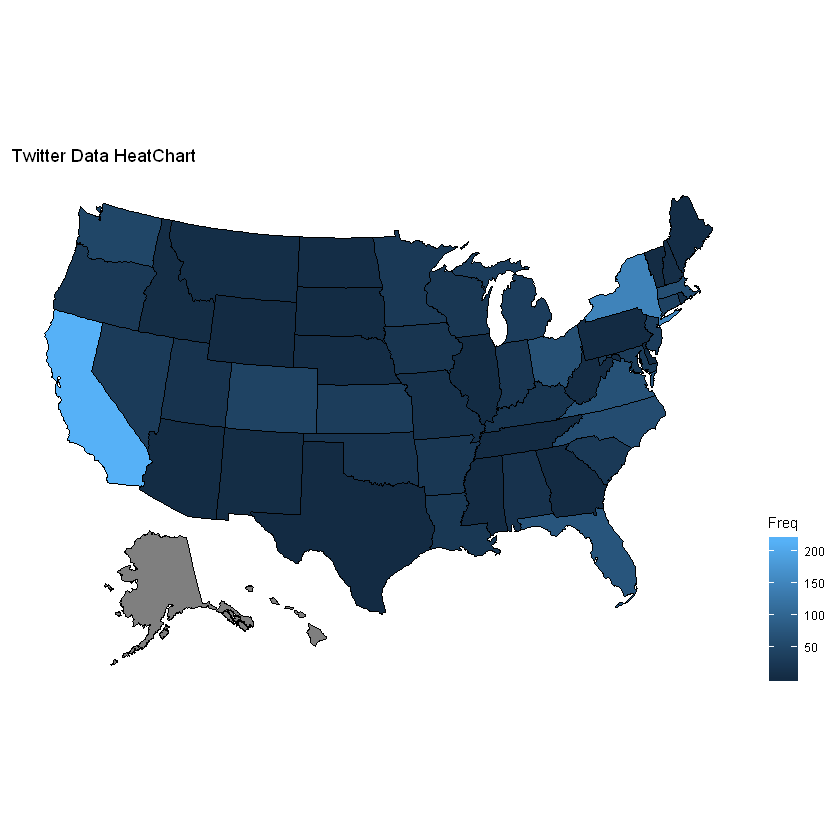

In [64]:
total_plt <- draw_map(locat1) 
total_plt + ggtitle("Twitter Data HeatChart")

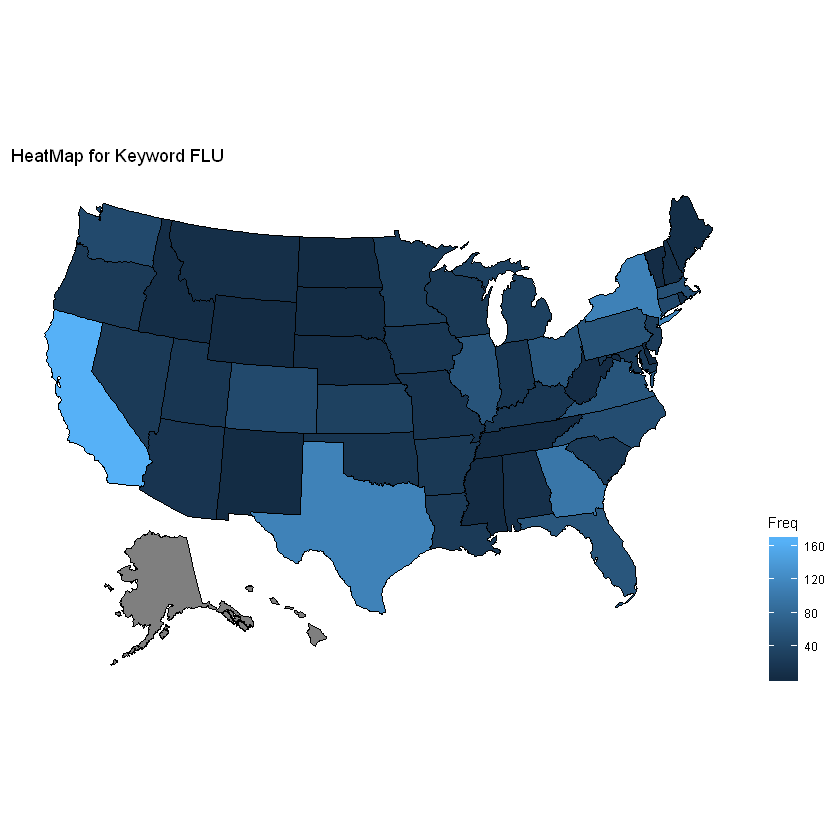

In [66]:
search_flu <- locat1[grepl("flu",locat1$text),]
#write.csv(search_flu, file="flu_tweets.csv")
flu_plt <- draw_map(search_flu)
flu_plt + ggtitle("HeatMap for Keyword FLU")

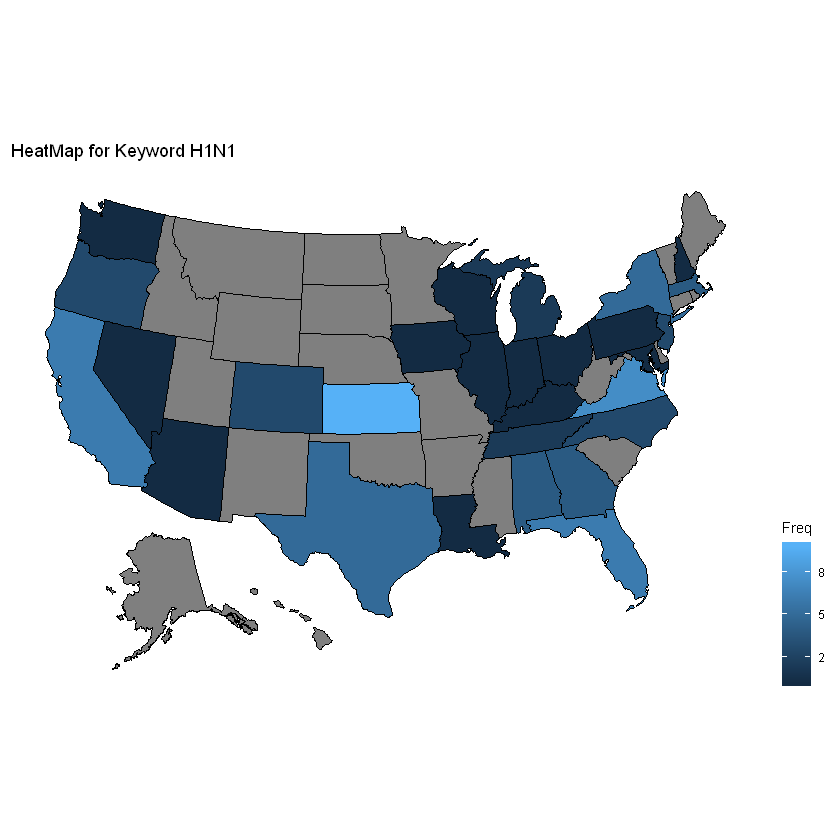

In [65]:
search_hn <- locat1[grepl("H1N1",locat1$text),]
#write.csv(search_hn, file="hn_tweets.csv")
hn_plt <- draw_map(search_hn)
hn_plt + ggtitle("HeatMap for Keyword H1N1")

In [ ]:
flu8 <- search_tweets("fight flu", geocode = lookup_coords("usa"), n = 1000, include_rts = FALSE)

In [ ]:
dim(flu8)

In [ ]:
flu9 <- search_tweets("flu 2019", geocode = lookup_coords("usa"), n = 1000, include_rts = FALSE)

In [ ]:
dim(flu9)

## Compare Maps

The next task is to compare the heatmap obtained in part 2 i.e the map generated from the CDC data and the heatmap generated in part 3 from the collected tweet data. To help with this, we use the 'grid.arrange()' function.

In [57]:
library(ggplot2)
library(usmap)

data3 <- read.csv(file='StateDatabyWeekforMap_2018-19week40-8.csv', header=T)
colfunc <- colorRampPalette(c("red", "yellow", "green"))
usmapdata <- merge(x=data3, y=statepop, x.by=STATENAME, y.by=full, x.all= TRUE)
usmapdata <- usmapdata[ usmapdata$STATENAME == usmapdata$full & usmapdata$WEEK == 8,]
unique(usmapdata$ACTIVITY.LEVEL)
usmapdata$ACTIVITY.LEVEL <- factor(usmapdata$ACTIVITY.LEVEL, levels = c("Level 10", "Level 9", "Level 8", "Level 7", "Level 6", "Level 5", "Level 4", "Level 1"))
#write.csv(usmapdata,file="cdcshiny.csv")
part2_plt <- plot_usmap(data = usmapdata, values = "ACTIVITY.LEVEL", lines = "black") +
  scale_fill_manual(values = c("#FF0000", "#FF3800" ,"#FF7100" ,"#FFAA00" ,"#FFE200" ,"#E2FF00" ,"#AAFF00", "#71FF00", "#38FF00" ,"#00FF00")) +
  theme(legend.position = "right",
        legend.title = element_text("ILI Activity Level", face = "bold"),
        plot.title = element_text(hjust = 0.5, face="bold", size=6.5)) + 
  ggtitle("2018-19 Influenza Season Week 8 ending Feb 23, 2019")



[1] Level 10 Level 8  Level 6  Level 7  Level 5  Level 4  Level 9  Level 1 
11 Levels: Level 0 Level 1 Level 10 Level 2 Level 3 Level 4 Level 5 ... Level 9

## Twitter Data VS CDC HeatMap
We display the heatmap generated for the CDC data and the total collected tweets against each other. The graphs illustrate the intensity of the tweet count from each of the corresponding states. With respect to the Twitter Data HeatChart, the intensity goes lighter with increase in count whereas for the CDC chart, darker the color greater the count. Twitter Chart shows light blue for the state of California depicting that it contains the largest number of tweets i.e about 215; a slightly darker shade of blue for New York with about 150 tweets. With respect to the CDC graph, the red shades potray the greater count.

Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"

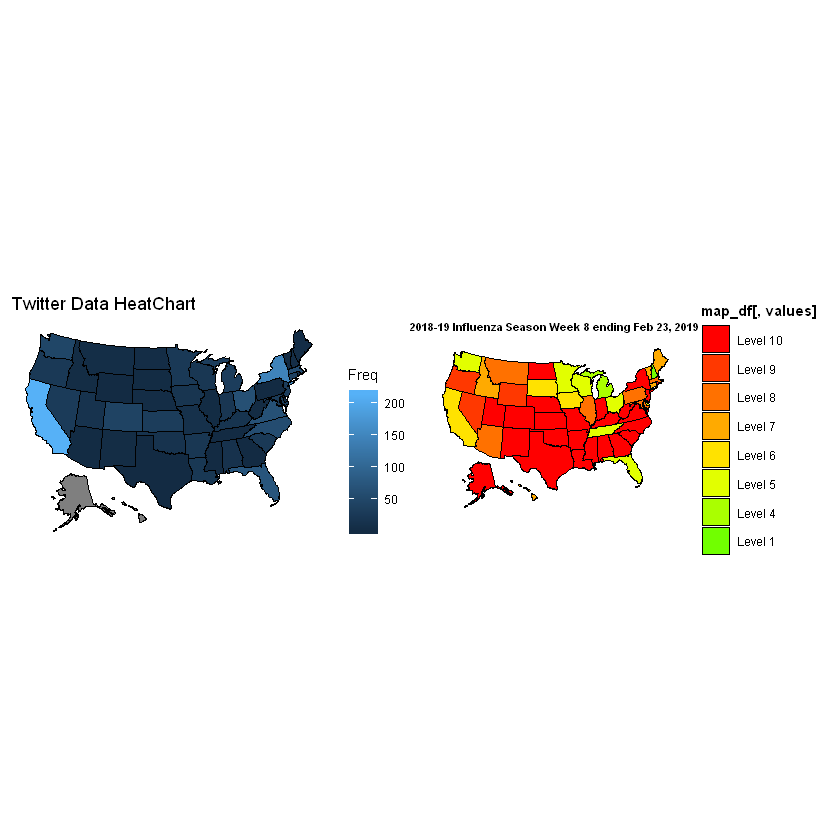

In [69]:
grid.arrange(total_plt + ggtitle("Twitter Data HeatChart"),part2_plt,nrow=1)

## CDC HeatMap VS Flu Data
We display the heatmap generated for the CDC data and the tweets collected for the keyword 'flu' against each other. Similar to the previous depiction, for Flu keyword DataChart, the intensity goes lighter with increase in count whereas for the CDC chart, darker the color greater the count. Flu Chart shows light blue for the state of California depicting that it contains the largest number of tweets; a slightly darker shade of blue for the state of New York, Texas. With respect to the CDC graph, the red shades potray the greater count.

Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"

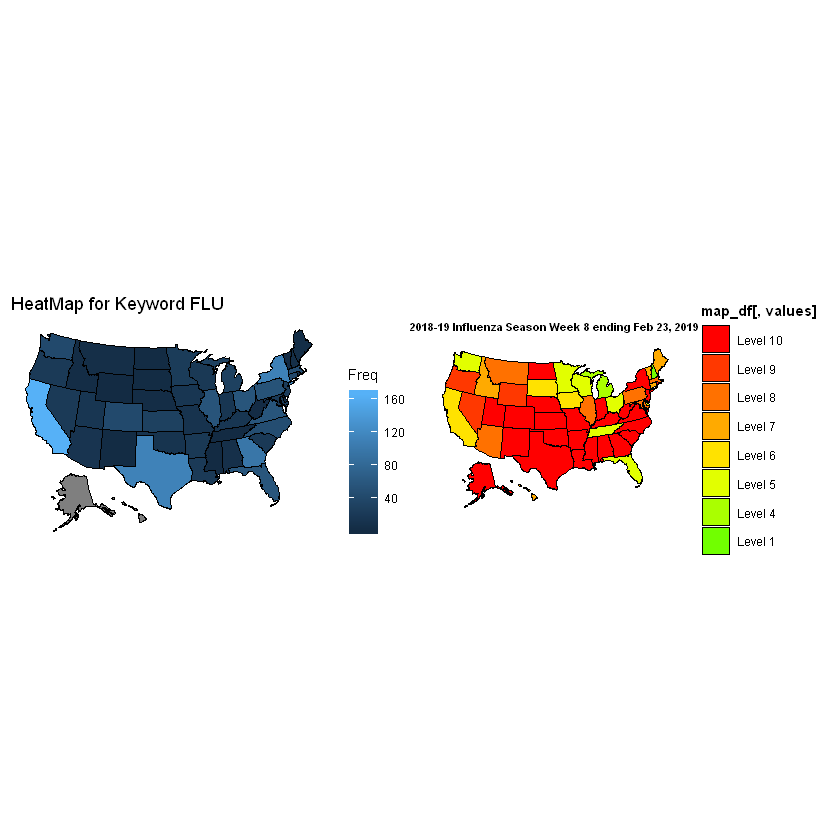

In [68]:
grid.arrange(flu_plt + ggtitle("HeatMap for Keyword FLU"),part2_plt,nrow=1)

## CDC HeatMap VS H1N1 Data
We display the heatmap generated for the CDC data and the tweets collected for the keyword 'H1N1' against each other. H1N1 Chart shows light blue for the state of Kansas depicting that it contains the largest number of tweets; a slightly darker shade of blue for the state of Florida, California. With respect to the CDC graph, the red shades potray the greater count.

Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"

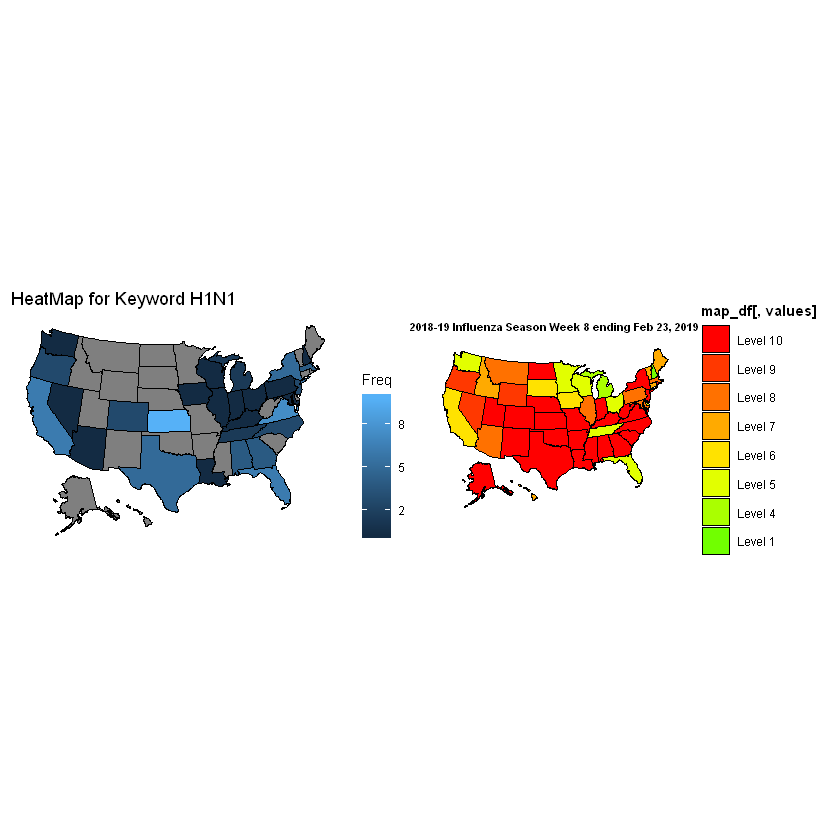

In [67]:
grid.arrange(hn_plt + ggtitle("HeatMap for Keyword H1N1"),part2_plt,nrow=1)